# Statistics

**Statistics** is the practice or science of collecting and analyzing data.

**Summary statistics** a fact about a summary of some data

what can statistics do? With the power of statistics, we can answer tons of different questions like: 

1. How likely is someone to purchase a product? Are people more likely to purchase it if they can use a different payment system?

2. How many occupants will your hotel have? How can you optimize occupancy? 

3. How many sizes of jeans need to be manufactured so they can fit 95% of the population? Should the same number of each size be produced?

4. A question like, Which ad is more effective in getting people to purchase a product? can be answered with A/B testing.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

## Types of Statistics

1. Descriptive statistics

> Focuses on describing and summarizing the data. After asking four friends how they get to work, we can see that 50% of them drive to work, 25% ride the bus, and 25% bike. 

2. Inferential statistics

> uses the data at hand, which is called sample data, to make inferences about a larger population. We could use inferential statistics to figure out what percent of people drive to work based on our sample data.

In [14]:
# import datasets
food_consumption = pd.read_csv('food_consumption.csv', index_col=0)
mammals = pd.read_csv('mammals.csv')

## Measures of Center

### Mean
The mean, often called the average, is one of the most common ways of summarizing data. To calculate mean, we add up all the numbers of interest and divide by the total number of data points.

In [3]:
mammals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       62 non-null     object 
 1   body_wt       62 non-null     float64
 2   brain_wt      62 non-null     float64
 3   non_dreaming  48 non-null     float64
 4   dreaming      50 non-null     float64
 5   total_sleep   58 non-null     float64
 6   life_span     58 non-null     float64
 7   gestation     58 non-null     float64
 8   predation     62 non-null     int64  
 9   exposure      62 non-null     int64  
 10  danger        62 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 5.5+ KB


In [4]:
mammals.head()

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [5]:
# pick rows where total_sleep is not null
mammals = mammals[mammals['total_sleep'].notna()]

In [6]:
# What is the average total_sleep time of mammals?
mammals['total_sleep'].mean()

10.532758620689648

In [7]:
# What is the average total_sleep time of mammals?
np.mean(mammals['total_sleep'])

10.532758620689648

### Median
The median is the value where 50% of the data is lower than it, and 50% of the data is higher. We can calculate this by sorting all the data points and taking the middle one.

In [8]:
# What is median sleep time?
np.median(mammals['total_sleep'])

10.45

In [9]:
mammals['total_sleep'].median()

10.45

### Mode
The mode is the most frequent value in the data. If we count how many occurrences there are of each variable and sort in descending order. We can also find the mode using the mode function from the statistics module. Mode is often used for categorical variables, since categorical variables can be unordered and often don't have an inherent numerical representation.

In [10]:
mammals['total_sleep'].value_counts()

8.4     3
12.5    3
10.3    3
13.2    2
3.9     2
9.8     2
10.7    2
6.2     2
3.8     2
5.4     2
19.4    2
17.4    1
3.3     1
12.8    1
11.2    1
10.6    1
17.0    1
9.6     1
10.9    1
13.7    1
19.9    1
6.6     1
2.6     1
11.0    1
13.3    1
8.0     1
8.2     1
9.1     1
6.1     1
16.5    1
19.7    1
14.5    1
9.7     1
3.1     1
8.6     1
18.1    1
10.8    1
14.4    1
12.0    1
13.0    1
13.8    1
8.3     1
2.9     1
15.8    1
Name: total_sleep, dtype: int64

In [11]:
# mode using statistics
statistics.mode(mammals['total_sleep'])

12.5

In [15]:
food_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 1 to 1430
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 55.9+ KB


In [16]:
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [21]:
# filter for Belgium
be_consumption = food_consumption[food_consumption['country']=='Belgium']

# filter for USA
usa_consumption = food_consumption[food_consumption['country']=='USA']

# caculate the mean and median consumption of Belgium
print('Belgium consumption Measures of Center')
print(be_consumption['consumption'].agg([np.mean, np.median]))

print()

# caculate the mean and median consumption of USA
print('USA consumption Measures of center')
print(usa_consumption['consumption'].agg([np.mean, np.median]))

Belgium consumption Measures of Center
mean      42.132727
median    12.590000
Name: consumption, dtype: float64

USA consumption Measures of center
mean      44.65
median    14.58
Name: consumption, dtype: float64


In [22]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA')]

# Group by country, select consumption column, and compute mean and median
be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median])

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


### Mean Vs Median

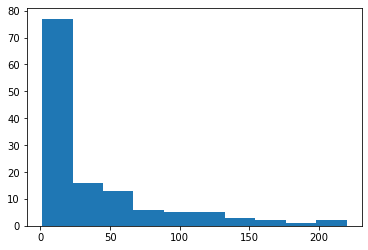

In [25]:
# Subset food_consumption to get the rows where food_category is 'rice'.
rice_consumption = food_consumption[food_consumption['food_category']=='rice']
rice_consumption

# Create a histogram of co2_emission for rice and show the plot.
plt.hist(rice_consumption['co2_emission']);
plt.show();


The histogram is right skewed. 

In [26]:
# Use .agg() to calculate the mean and median of co2_emission for rice.
rice_consumption['co2_emission'].agg([np.mean, np.median])

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice is the **Median**

## Measures of Spread

Spread describes how spread apart or close together the data points are. 

1.  Variance

Variance measures the average distance from each data point to the data's mean. To calculate the variance, we start by calculating the distance between each point and the mean, so we get one number for every data point. We then square each distance and then add them all together. Finally, we divide the sum of squared distances by the number of data points minus 1, giving us the variance. The higher the variance, the more spread out the data is. It's important to note that the units of variance are squared. We can calculate the variance in one step using np.var, setting the ddof argument to 1. If we don't specify ddof equals 1, a slightly different formula is used to calculate variance that should only be used on a full population, not a sample.

2. Standard deviation

The standard deviation is another measure of spread, calculated by taking the square root of the variance. It can be calculated using np.std. Just like np.var, we need to set ddof to 1. The nice thing about standard deviation is that the units are usually easier to understand since they're not squared.

3.  Mean absolute deviation

Mean absolute deviation takes the absolute value of the distances to the mean, and then takes the mean of those differences. While this is similar to standard deviation, it's not exactly the same. Standard deviation squares distances, so longer distances are penalized more than shorter ones, while mean absolute deviation penalizes each distance equally. One isn't better than the other, but SD is more common than MAD.

In [29]:
# Calculate the quartiles of the co2_emission column of food_consumption.
np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1])

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [32]:
# Calculate the quartiles of the co2_emission column of food_consumption.
np.quantile(food_consumption['co2_emission'], np.linspace(0,1,5))

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [33]:
# Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.
np.quantile(food_consumption['co2_emission'], np.linspace(0,1,6))

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [34]:
# Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).
np.quantile(food_consumption['co2_emission'], np.linspace(0,1,11))

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

In [36]:
# Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.
food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std])

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


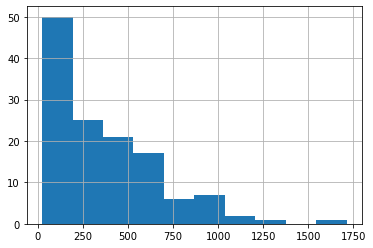

In [37]:
# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category']=='beef']['co2_emission'].hist()
# Show plot
plt.show()

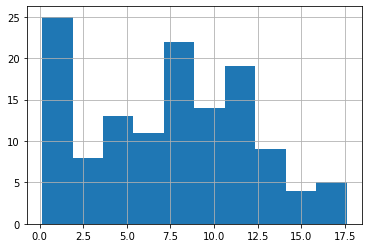

In [38]:
# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category']=='eggs']['co2_emission'].hist()
# Show plot
plt.show()

Superb spread measurement! Beef has the largest amount of variation in its CO2 emissions, while eggs have a relatively small amount of variation.

### Finding outliers using IQR

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. 

If a value is less than _q1 - 1.5*iqr_  or greater than _q3 + 1.5*iqr_, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

In [39]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
emissions_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [46]:
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

print('q1: ' + str(q1))
print('q3: ' + str(q3))
print('iqr: ' + str(iqr))
print()
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print('lower: ' + str(lower))
print('upper: ' +str(upper))
print()
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

q1: 446.66
q3: 1111.1525000000001
iqr: 664.4925000000001

lower: -550.0787500000001
upper: 2107.89125

country
Argentina    2172.4
Name: co2_emission, dtype: float64
